<a href="https://colab.research.google.com/github/SUGAMYA-k/PRODIGY_ML_01/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving train.csv to train.csv


Import Required Libraries





In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


 Load the Dataset

In [ ]:
# Load the dataset
url = "train.csv"  # Replace with your file path
df = pd.read_csv(url)

# Display basic info about the dataset
print(df.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

Select Relevant Features

In [ ]:
# Select relevant features
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

# Filter data
X = df[features]
y = df[target]

# Display basic info about the selected data
print(X.describe())
print(y.describe())


         GrLivArea  BedroomAbvGr     FullBath
count  1460.000000   1460.000000  1460.000000
mean   1515.463699      2.866438     1.565068
std     525.480383      0.815778     0.550916
min     334.000000      0.000000     0.000000
25%    1129.500000      2.000000     1.000000
50%    1464.000000      3.000000     2.000000
75%    1776.750000      3.000000     2.000000
max    5642.000000      8.000000     3.000000
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Split the Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train the Linear Regression Model

In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [   104.02630701 -26655.16535734  30014.32410896]
Intercept: 52261.74862694461


Make Predictions and Evaluate

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 2806426667.247853
R-squared Score: 0.6341189942328371


Visualize Results

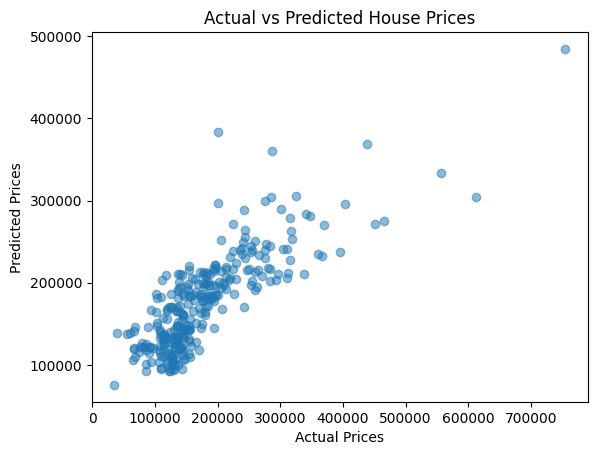

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
